In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
from parameters import plotting_parameters

In [59]:
ML_integration_multiO = pd.read_csv('../../data/ML_AND_Integration_AND_Multiomics.csv')
ML_integration_multiO.head(1)

Unnamed: 0                                 Full name of paper  \
0           0  A gene prioritization method based on a swine ...   

                                          Doi  Year  Month  \
0  https://doi.org/10.1038/s42003-020-01233-4  2020      9   

              Author email TGCA?  Number citations  \
0  shzhao@mail.hzau.edu.cn   NaN                15   

                                 Other (state which)  Autoencoder  ...  \
0  integrates affinity matrix and network fusion ...          NaN  ...   

   Dataset  Dataset2  Dataset3  TCGA  OWN  OTHER  single-paper sets  \
0      OWN       NaN       NaN   NaN  1.0    NaN                NaN   

   Updated_DB_TCGA Updated_DB_Other  Updated_DB_exclude  
0              NaN              1.0                 NaN  

[1 rows x 206 columns]

In [60]:

ML_integration = pd.read_csv('../../data/ML_AND_Integration.csv', index_col=None, sep=';')
ML_integration = ML_integration.drop('Unnamed: 0', axis=1)
ML_integration.head(1)

Doi  Year  Month  Author email  TGCA?  \
0  10.1016/j.agsy.2019.03.015  2019    7.0           NaN    NaN   

   Number citations Other (state which)  Autoencoder  \
0              95.0                 NaN          NaN   

  Convolutional neural network (no bottleneck)  \
0                                          NaN   

   All-to-all network (no bottleneck)  ...  INFO GAIN RATIO  INFO GAIN  \
0                                 NaN  ...              NaN        NaN   

   Bagged trees  Physics-based ML  miRcorrNet  \
0           NaN               NaN         NaN   

   adaptive-network-based fuzzy inference system (ANFIS)   Pymatgen  Factsage  \
0                                                NaN            NaN       NaN   

   Aflow  Density functional theory  
0    NaN                        NaN  

[1 rows x 133 columns]

In [61]:
for col in ML_integration_multiO.columns:
    print(col)

Unnamed: 0
Full name of paper
Doi
Year
Month
Author email
TGCA?
Number citations
Other (state which)
Autoencoder
All-to-all network (no bottleneck)
Convolutional neural network
Recurrent Neural Network (incl LSTM)
K-means clustering
SVM
capsule network
Other Gradient Boosting Machines (excl the main algos XGBoost, lightGBM, Adaboost)
Cox-PH
graph-based model
Transformer
Generative Adverserial Networks
Graph attention network
Logistic regression
Biweight midcorrelation
Sparse regression
Network constraints
Similarity matrix
Random forest
K-Nearest neighbours
PCA
Non-Parametric Combination
Similarity network fusion
Network optimisation
Graph-constrained dimensionality reduction
Kernel-based methods
Flux Balance Analysis
DNN regression
DNN classification
iCluster
iCluster Bayes
XGBoost
Naive Bayes
Radial Basis Function
Elastic net
t-SNE
Light GBM
The Prize-Collecting Steiner Forest
Non-negative matrix factorization
Adaboost
Lasso Regression
Transfer learning
Linear regression
Ridge regres

In [62]:
#Rename columns with long names
ML_integration_multiO= ML_integration_multiO.rename(columns={'Other Gradient Boosting Machines (excl the main algos XGBoost, lightGBM, Adaboost)': 'Other Gradient Boosting Machines'}) 
ML_integration = ML_integration.rename(columns={'Other Gradient Boosting Machines (excl the main algos XGBoost, lightGBM, Adaboost)': 'Other Gradient Boosting Machines'}) 

ML_integration = ML_integration.rename(columns={'Other Gradient Boosting Machines (excl the main algos XGBoost, lightGBM, Adaboost)': 'Other Gradient Boosting Machines'}) 
ML_integration = ML_integration.rename(columns={'adaptive-network-based fuzzy inference system (ANFIS) ':'ANFIS'}) 

ML_integration = ML_integration.rename(columns={'minimum redundancy and maximum relevance feature selection': 'Min redundancy max relevancy'}) 
ML_integration = ML_integration.rename(columns={'minimum redundancy and maximum relevance feature selection': 'Min redundancy max relevancy'}) 



In [63]:
ML_integration.shape

(100, 133)

In [64]:
ML_integration_multiO.shape

(100, 206)

In [65]:
technique_columns = ML_integration.columns[7:]

for col in ML_integration_multiO.columns:

    if col not in technique_columns:
        ML_integration_multiO = ML_integration_multiO.drop(col, axis=1)

In [66]:
# Get the list of techniques that appear more than once from ml and multi-o
ML_integration_multiO_sum_plot_list = ML_integration_multiO.sum()
#ML_integration_multiO_sum_plot_list = ML_integration_multiO_sum_plot_list[ML_integration_multiO_sum_plot_list>1]
ML_integration_multiO_sum_plot_list = ML_integration_multiO_sum_plot_list.index
ML_integration_multiO_sum_plot_list

/var/folders/wl/hg987ghd6mz8h66gkk6xwp180000gn/T/ipykernel_13757/3928309157.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ML_integration_multiO_sum_plot_list = ML_integration_multiO.sum()


Index(['Autoencoder', 'All-to-all network (no bottleneck)',
       'Recurrent Neural Network (incl LSTM)', 'K-means clustering', 'SVM',
       'capsule network', 'Other Gradient Boosting Machines', 'Cox-PH',
       'Transformer', 'Generative Adverserial Networks',
       ...
       'RELIEF', 'UNCERTAINTY', 'GINI INDEX', 'CHI SQUARED', 'RULE',
       'INFO GAIN RATIO', 'INFO GAIN', 'Bagged trees', 'Physics-based ML',
       'miRcorrNet'],
      dtype='object', length=116)

In [67]:
ML_integration_sum_plot = ML_integration[1:]
ML_integration_sum_plot = ML_integration_sum_plot.sum()
ML_integration_sum_plot = ML_integration_sum_plot.drop(['Doi', 
                                                        'Year', 
                                                        'Month', 
                                                        'Author email', 
                                                        'TGCA?',
                                                        'Number citations'])
ML_integration_sum_plot_list = ML_integration_sum_plot.index
ML_integration_sum_plot_list

/var/folders/wl/hg987ghd6mz8h66gkk6xwp180000gn/T/ipykernel_13757/1139946663.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ML_integration_sum_plot = ML_integration_sum_plot.sum()


Index(['Autoencoder', 'All-to-all network (no bottleneck)',
       'Recurrent Neural Network (incl LSTM)', 'capsule network',
       'graph-based model', 'Transformer', 'Generative Adverserial Networks',
       'Graph attention network', 'K-means clustering', 'SVM',
       ...
       'INFO GAIN RATIO', 'INFO GAIN', 'Bagged trees', 'Physics-based ML',
       'miRcorrNet', 'ANFIS', 'Pymatgen', 'Factsage', 'Aflow',
       'Density functional theory'],
      dtype='object', length=122)

In [68]:
print(len(ML_integration_sum_plot_list))
print(len(ML_integration_multiO_sum_plot_list))

122
116


In [69]:

item_in_either_list = []

for item in ML_integration_sum_plot_list:

    if item not in item_in_either_list:
        item_in_either_list.append(item)


for item in ML_integration_multiO_sum_plot_list:

    if item not in item_in_either_list:
        item_in_either_list.append(item)

In [70]:
print(len(item_in_either_list))

124


In [71]:
#  Drop from integration
for col in ML_integration.columns:
    if col not in item_in_either_list:
        ML_integration = ML_integration.drop(col,axis=1)

In [72]:
#  Drop from multio integration
for col in ML_integration_multiO.columns:
    if col not in item_in_either_list:
        ML_integration_multiO = ML_integration_multiO.drop(col,axis=1)

In [73]:
ML_integration_multiO.shape

(100, 117)

## Prepare data for ml + multiO

In [74]:
ML_integration_multiO_sum_plot = ML_integration_multiO.sum()
ML_integration_multiO_sum_plot = ML_integration_multiO_sum_plot[ML_integration_multiO_sum_plot>0]
ML_integration_multiO_sum_plot = ML_integration_multiO_sum_plot.sort_values(ascending=False)
ML_integration_multiO_sum_plot

/var/folders/wl/hg987ghd6mz8h66gkk6xwp180000gn/T/ipykernel_13757/2473566885.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ML_integration_multiO_sum_plot = ML_integration_multiO.sum()


Autoencoder                         39.0
Cox-PH                              25.0
Random forest                       24.0
K-means clustering                  22.0
SVM                                 19.0
                                    ... 
Multiple Kernel Learning             1.0
Network constraints                  1.0
UMAP                                 1.0
Multiple Factor Analysis             1.0
Bayesian factor regression model     1.0
Length: 83, dtype: float64

In [75]:
ML_integration_sum_plot.shape

(122,)

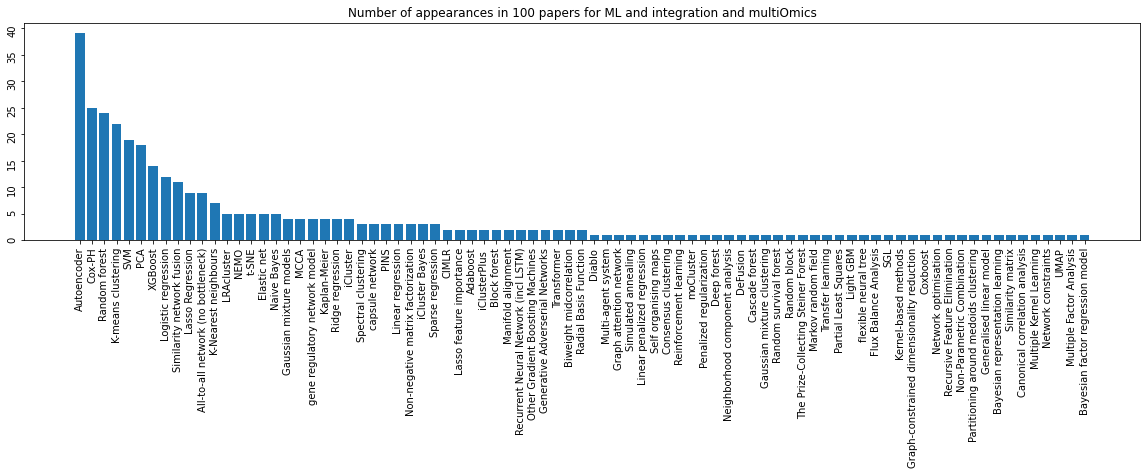

In [76]:
#Plot data
fig, axs = plt.subplots(1,1,figsize=(20,4), gridspec_kw={'height_ratios': [1]})
axs.bar(height=ML_integration_multiO_sum_plot, x= ML_integration_multiO_sum_plot.index)
axs.tick_params(labelrotation=90)
axs.set_title("Number of appearances in 100 papers for ML and integration and multiOmics")

plt.savefig("../../figures/Supplemental_all_ML_integration_multio.png", dpi=400, bbox_inches = "tight")
plt.savefig("../../figures/Supplemental_all_ML_integration_multio.pdf", dpi=400, bbox_inches = "tight")

## Prepare data for ML and integration

In [77]:
ML_integration_sum_plot = ML_integration
ML_integration_sum_plot = ML_integration_sum_plot.sum()
ML_integration_sum_plot = ML_integration_sum_plot[ML_integration_sum_plot>0]

/var/folders/wl/hg987ghd6mz8h66gkk6xwp180000gn/T/ipykernel_13757/2797994015.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ML_integration_sum_plot = ML_integration_sum_plot.sum()


In [78]:
ML_integration_sum_plot

Autoencoder                              1.0
All-to-all network (no bottleneck)      11.0
Recurrent Neural Network (incl LSTM)     7.0
K-means clustering                       5.0
SVM                                     37.0
                                        ... 
ANFIS                                    1.0
Pymatgen                                 1.0
Factsage                                 1.0
Aflow                                    1.0
Density functional theory                1.0
Length: 62, dtype: float64

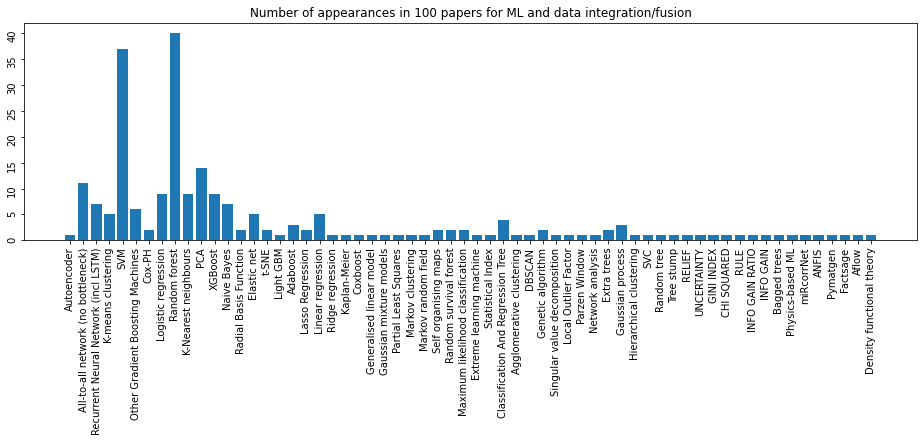

In [79]:
#Plot data
fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(height=ML_integration_sum_plot, x= ML_integration_sum_plot.index)
axs.tick_params(labelrotation=90)
axs.set_title("Number of appearances in 100 papers for ML and data integration/fusion")

plt.savefig("../../figures/Supplemental_all_ML_integration.png", dpi=400, bbox_inches = "tight")
plt.savefig("../../figures/Supplemental_all_ML_integration.pdf", dpi=400, bbox_inches = "tight")


In [80]:
ML_integration_sum_plot_df = pd.DataFrame(ML_integration_sum_plot)
ML_integration_sum_plot_df["Technique"] = ML_integration_sum_plot_df.index
ML_integration_sum_plot_df["Count"] = ML_integration_sum_plot_df[0]
ML_integration_sum_plot_df = ML_integration_sum_plot_df.reset_index()
ML_integration_sum_plot_df = ML_integration_sum_plot_df.drop([0, "index"], axis=1)
ML_integration_sum_plot_df

Technique  Count
0                            Autoencoder    1.0
1     All-to-all network (no bottleneck)   11.0
2   Recurrent Neural Network (incl LSTM)    7.0
3                     K-means clustering    5.0
4                                    SVM   37.0
..                                   ...    ...
57                                 ANFIS    1.0
58                              Pymatgen    1.0
59                              Factsage    1.0
60                                 Aflow    1.0
61             Density functional theory    1.0

[62 rows x 2 columns]

In [81]:
ML_integration_multiO_sum_plot

Autoencoder                         39.0
Cox-PH                              25.0
Random forest                       24.0
K-means clustering                  22.0
SVM                                 19.0
                                    ... 
Multiple Kernel Learning             1.0
Network constraints                  1.0
UMAP                                 1.0
Multiple Factor Analysis             1.0
Bayesian factor regression model     1.0
Length: 83, dtype: float64

In [82]:
ML_integration_multiO_sum_plot = pd.DataFrame(ML_integration_multiO_sum_plot)
ML_integration_multiO_sum_plot["Technique"] = ML_integration_multiO_sum_plot.index
ML_integration_multiO_sum_plot["Count"] = ML_integration_multiO_sum_plot[0]
ML_integration_multiO_sum_plot = ML_integration_multiO_sum_plot.reset_index()
ML_integration_multiO_sum_plot = ML_integration_multiO_sum_plot.drop([0, "index"], axis=1)
ML_integration_multiO_sum_plot

Technique  Count
0                        Autoencoder   39.0
1                             Cox-PH   25.0
2                      Random forest   24.0
3                 K-means clustering   22.0
4                                SVM   19.0
..                               ...    ...
78          Multiple Kernel Learning    1.0
79               Network constraints    1.0
80                              UMAP    1.0
81          Multiple Factor Analysis    1.0
82  Bayesian factor regression model    1.0

[83 rows x 2 columns]

In [83]:
merged_data_set = pd.merge(left = ML_integration_multiO_sum_plot, right = ML_integration_sum_plot_df, on="Technique", how="outer")
merged_data_set

Technique  Count_x  Count_y
0                  Autoencoder     39.0      1.0
1                       Cox-PH     25.0      2.0
2                Random forest     24.0     40.0
3           K-means clustering     22.0      5.0
4                          SVM     19.0     37.0
..                         ...      ...      ...
111                      ANFIS      NaN      1.0
112                   Pymatgen      NaN      1.0
113                   Factsage      NaN      1.0
114                      Aflow      NaN      1.0
115  Density functional theory      NaN      1.0

[116 rows x 3 columns]

In [84]:
droplist = ['Neural network', 'Gradient Boosting Machines', 'Ensemble learning', 'Boosting', 'Clustering']

In [85]:
merged_data_set = merged_data_set.query("Technique not in @droplist")

In [86]:
# RGB codes from Seaborn's colorblind library
gold = (211/255, 147/255, 52/255)
blue = (49/255, 113/255, 173/255)
purple = (192/255, 124/255, 184/255)
green = (70/255, 156/255, 118/255)
yellow = (234/255, 224/255, 89/255)
orange = (198/255, 101/255, 38/255)
lightblue = (111/255, 178/255, 228/255)
greybrown = (193/255, 147/255, 104/255)
pink = (240/255, 178/255, 225/255)
grey = (148/255, 148/255, 148/255)

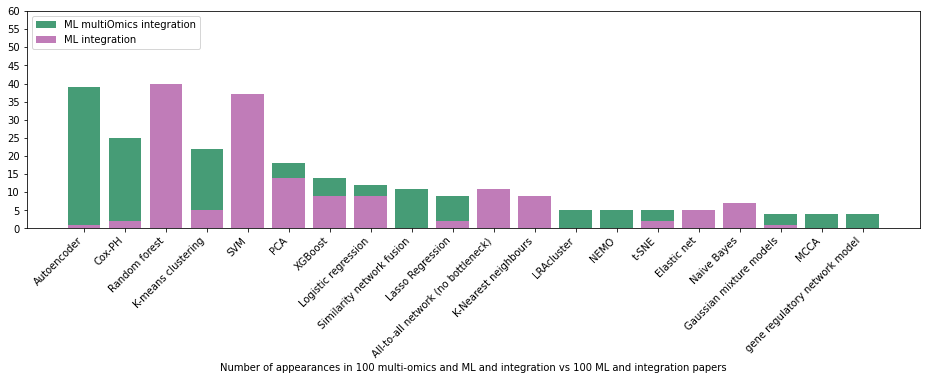

In [87]:
num_plotted = 35
fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(merged_data_set.Technique[:20], merged_data_set.Count_x[:20], color = green, label='ML multiOmics integration', alpha=1)
axs.bar(merged_data_set.Technique[:20], merged_data_set.Count_y[:20], color = purple,  label='ML integration', alpha=1)
axs.set_xlabel("Number of appearances in 100 multi-omics and ML and integration vs 100 ML and integration papers")
axs.set_yticks(np.linspace(0,60,13))
plt.xticks(rotation=45, ha='right')
axs.legend()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0,

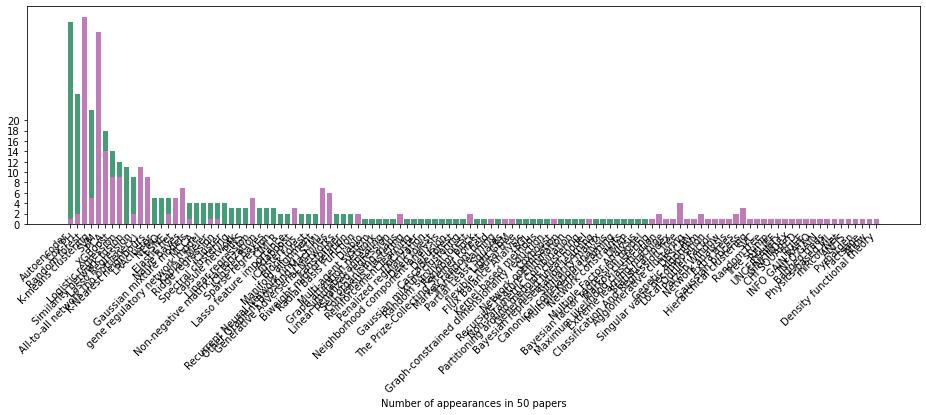

In [88]:
fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(merged_data_set.Technique, merged_data_set.Count_x, color = green, label='ML multiOmics integration')
axs.bar(merged_data_set.Technique, merged_data_set.Count_y, color = purple,  label='ML integration')
axs.set_xlabel("Number of appearances in 50 papers")
axs.set_yticks(np.linspace(0,20,11))
plt.xticks(rotation=45, ha='right')

In [89]:
all_multio = np.sum(merged_data_set.Count_x)
all_general = np.sum(merged_data_set.Count_y)

merged_data_set['normalised_x'] = merged_data_set['Count_x']/all_multio
merged_data_set['normalised_y'] = merged_data_set['Count_y']/all_general

In [90]:
all_general

229.0

In [91]:
merged_data_set

Technique  Count_x  Count_y  normalised_x  normalised_y
0                  Autoencoder     39.0      1.0      0.113372      0.004367
1                       Cox-PH     25.0      2.0      0.072674      0.008734
2                Random forest     24.0     40.0      0.069767      0.174672
3           K-means clustering     22.0      5.0      0.063953      0.021834
4                          SVM     19.0     37.0      0.055233      0.161572
..                         ...      ...      ...           ...           ...
111                      ANFIS      NaN      1.0           NaN      0.004367
112                   Pymatgen      NaN      1.0           NaN      0.004367
113                   Factsage      NaN      1.0           NaN      0.004367
114                      Aflow      NaN      1.0           NaN      0.004367
115  Density functional theory      NaN      1.0           NaN      0.004367

[116 rows x 5 columns]

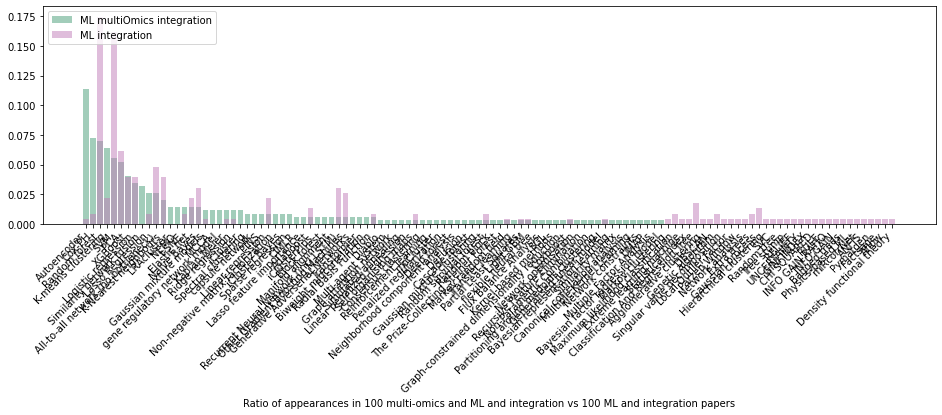

In [92]:
fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(merged_data_set.Technique, merged_data_set.normalised_x, color = green, label='ML multiOmics integration', alpha=0.5)
axs.bar(merged_data_set.Technique, merged_data_set.normalised_y, color = purple,  label='ML integration', alpha=0.5)
axs.set_xlabel("Ratio of appearances in 100 multi-omics and ML and integration vs 100 ML and integration papers")
plt.xticks(rotation=45, ha='right')
axs.legend()

In [93]:
sorted = merged_data_set.sort_values(by='normalised_y', ascending=False)

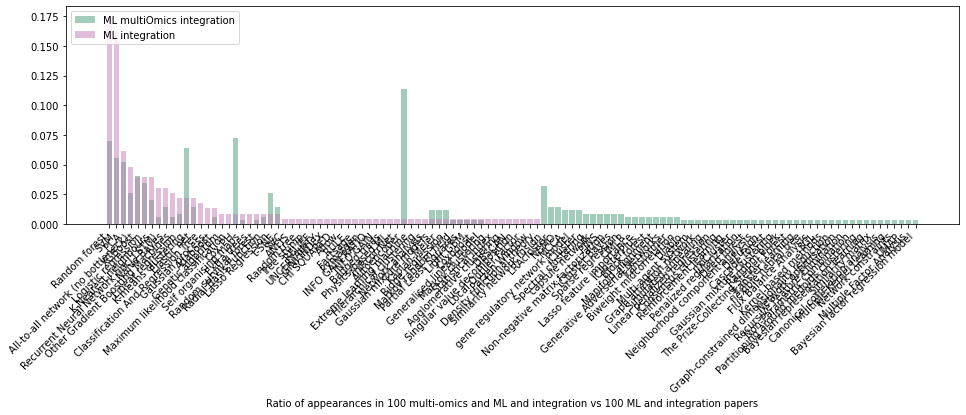

In [94]:
fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(sorted.Technique, sorted.normalised_x, color = green, label='ML multiOmics integration', alpha=0.5)
axs.bar(sorted.Technique, sorted.normalised_y, color = purple,  label='ML integration', alpha=0.5)
axs.set_xlabel("Ratio of appearances in 100 multi-omics and ML and integration vs 100 ML and integration papers")
plt.xticks(rotation=45, ha='right')
axs.legend()